<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Semana%206/Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analysis with Python**

**Alumno:** Jesús Angel Rincón Ruiz

**Matricula:** A01793960

**Actividad Semana 6 - Visualización**

**Objetivos**

Desarrollar en un cuaderno en Jupyter o Google Colab (o IDE de tu preferencia) cada uno de los puntos indicados para completar y documentar la actividad con el conjunto de datos proporcionado.

**Conjunto de Datos**

Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.




In [2]:
#Se cargan diferentes librerias para llevar a cabo el análisis de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**1. Descarga los datosEnlaces a un sitio externo y carga el dataset en tu libreta**

In [3]:
input = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [4]:
df = pd.read_csv(input, index_col = 0)
df.index.name = None #Eliminamos la columna Index ya que nuestro dataframe ya cuenta con su columna ID
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [5]:
#Copiamos la base de datos
ndf = df.copy()

In [6]:
#Cambiar los nombres de las columnas para un mayor entendimiento

ndf.columns = ["Given credit", "Gender", "Education", "Marital status","Age","Pay_Sep","Pay_Ago", "Pay_Jul", "Pay_Jun", "Pay_May", "Pay_Abr","Bill statement Sept", "Bill statement Aug", "Bill statement Jul", "Bill statement Jun", "Bill statement May",
               "Bill statement Apr", "Previous payment Sept", "Previous payment Aug", "Previous payment Jul", "Previous payment Jun",
               "Previous payment May", "Previous payment Apr", "Y"]

In [7]:
#comprobar nombre de columnas
ndf.head()

,Given credit,Gender,Education,Marital status,Age,Pay_Sep,Pay_Ago,Pay_Jul,Pay_Jun,Pay_May,...,Bill statement Jun,Bill statement May,Bill statement Apr,Previous payment Sept,Previous payment Aug,Previous payment Jul,Previous payment Jun,Previous payment May,Previous payment Apr,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

In [8]:
np.shape(ndf)

(30000, 24)

In [9]:
ndf.columns

Index(['Given credit', 'Gender', 'Education', 'Marital status', 'Age',
       'Pay_Sep', 'Pay_Ago', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Abr',
       'Bill statement Sept', 'Bill statement Aug', 'Bill statement Jul',
       'Bill statement Jun', 'Bill statement May', 'Bill statement Apr',
       'Previous payment Sept', 'Previous payment Aug', 'Previous payment Jul',
       'Previous payment Jun', 'Previous payment May', 'Previous payment Apr',
       'Y'],
      dtype='object')

In [10]:
ndf.head()

,Given credit,Gender,Education,Marital status,Age,Pay_Sep,Pay_Ago,Pay_Jul,Pay_Jun,Pay_May,...,Bill statement Jun,Bill statement May,Bill statement Apr,Previous payment Sept,Previous payment Aug,Previous payment Jul,Previous payment Jun,Previous payment May,Previous payment Apr,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [11]:
ndf.dtypes

Given credit               int64
Gender                   float64
Education                float64
Marital status           float64
Age                      float64
Pay_Sep                  float64
Pay_Ago                  float64
Pay_Jul                  float64
Pay_Jun                  float64
Pay_May                  float64
Pay_Abr                  float64
Bill statement Sept      float64
Bill statement Aug       float64
Bill statement Jul       float64
Bill statement Jun       float64
Bill statement May       float64
Bill statement Apr       float64
Previous payment Sept    float64
Previous payment Aug     float64
Previous payment Jul     float64
Previous payment Jun     float64
Previous payment May     float64
Previous payment Apr     float64
Y                        float64
dtype: object

In [12]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Given credit           30000 non-null  int64  
 1   Gender                 29999 non-null  float64
 2   Education              29998 non-null  float64
 3   Marital status         29998 non-null  float64
 4   Age                    29995 non-null  float64
 5   Pay_Sep                29997 non-null  float64
 6   Pay_Ago                29995 non-null  float64
 7   Pay_Jul                29993 non-null  float64
 8   Pay_Jun                29991 non-null  float64
 9   Pay_May                29984 non-null  float64
 10  Pay_Abr                29986 non-null  float64
 11  Bill statement Sept    29989 non-null  float64
 12  Bill statement Aug     29989 non-null  float64
 13  Bill statement Jul     29987 non-null  float64
 14  Bill statement Jun     29985 non-null  float64
 15  Bi

In [13]:
#confirmamos si hay datos faltantes
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

**3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna**

In [14]:
#eliminamos los datos perdidos ya que no representan un numero importante para la muestra.

ndf_clean = ndf.dropna()
ndf_clean.isna().any()

Given credit             False
Gender                   False
Education                False
Marital status           False
Age                      False
Pay_Sep                  False
Pay_Ago                  False
Pay_Jul                  False
Pay_Jun                  False
Pay_May                  False
Pay_Abr                  False
Bill statement Sept      False
Bill statement Aug       False
Bill statement Jul       False
Bill statement Jun       False
Bill statement May       False
Bill statement Apr       False
Previous payment Sept    False
Previous payment Aug     False
Previous payment Jul     False
Previous payment Jun     False
Previous payment May     False
Previous payment Apr     False
Y                        False
dtype: bool

**4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**

In [15]:
ndf_clean.describe()

,Given credit,Gender,Education,Marital status,Age,Pay_Sep,Pay_Ago,Pay_Jul,Pay_Jun,Pay_May,...,Bill statement Jun,Bill statement May,Bill statement Apr,Previous payment Sept,Previous payment Aug,Previous payment Jul,Previous payment Jun,Previous payment May,Previous payment Apr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


**5. Realiza el conteo de las variables categóricas**

Despues de revisar las descripciones de las variables se encuentran las siguientes variables categoricas:
 
X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 


In [ ]:
#valores de las variables categoricas

In [16]:
ndf_clean['Gender'].value_counts()

2.0    18095
1.0    11863
Name: Gender, dtype: int64

In [18]:
ndf_clean['Education'].value_counts()

2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: Education, dtype: int64

In [19]:
ndf_clean['Marital status'].value_counts()

2.0    15939
1.0    13643
3.0      322
0.0       54
Name: Marital status, dtype: int64

In [20]:
ndf_clean['Pay_Sep'].value_counts()

 0.0    14717
-1.0     5680
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: Pay_Sep, dtype: int64

In [21]:
ndf_clean['Pay_Ago'].value_counts()

 0.0    15709
-1.0     6042
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: Pay_Ago, dtype: int64

In [22]:
ndf_clean['Pay_Ago'].value_counts()

 0.0    15709
-1.0     6042
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: Pay_Ago, dtype: int64

In [23]:
ndf_clean['Pay_Jul'].value_counts()

 0.0    15742
-1.0     5930
-2.0     4082
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: Pay_Jul, dtype: int64

In [24]:
ndf_clean['Pay_Jun'].value_counts()

 0.0    16431
-1.0     5681
-2.0     4343
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: Pay_Jun, dtype: int64

In [25]:
ndf_clean['Pay_May'].value_counts()

 0.0    16925
-1.0     5533
-2.0     4541
 2.0     2618
 3.0      178
 4.0       84
 7.0       57
 5.0       17
 6.0        4
 8.0        1
Name: Pay_May, dtype: int64

In [26]:
ndf_clean['Pay_Abr'].value_counts()

 0.0    16266
-1.0     5731
-2.0     4890
 2.0     2760
 3.0      183
 4.0       49
 7.0       46
 6.0       18
 5.0       13
 8.0        2
Name: Pay_Abr, dtype: int64

**6. Escala los datos, si consideras necesario**

In [63]:
#eliminamos las columnas categoricas como lo son (X2: Gender, X3: Education, X4: Marital status, X6 - X11: History of past payment)

df2 = ndf_clean.copy()

In [64]:
drop = ['Gender', 'Education', 'Marital status', 'Pay_Sep', 'Pay_Ago', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Abr','Y']
df2.drop(columns = drop, inplace = True)
df2.head()

,Given credit,Age,Bill statement Sept,Bill statement Aug,Bill statement Jul,Bill statement Jun,Bill statement May,Bill statement Apr,Previous payment Sept,Previous payment Aug,Previous payment Jul,Previous payment Jun,Previous payment May,Previous payment Apr
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


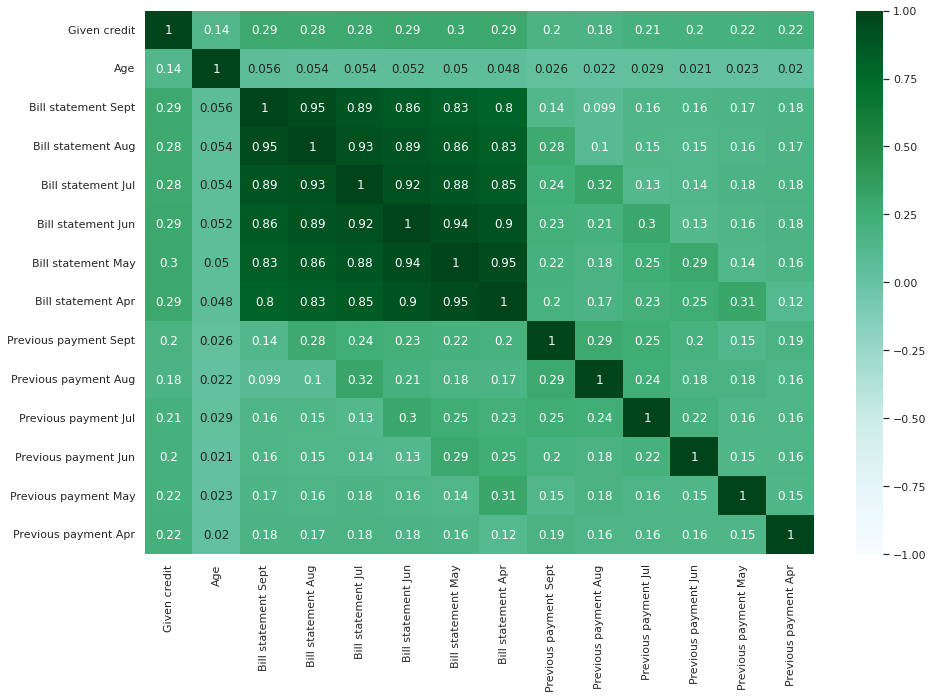

In [85]:
corrs = df2.corr()

sns.set(rc = {"figure.figsize": (15,10)})
sns.heatmap(corrs, vmin = -1, vmax =1, cmap = "BuGn", annot = True)

In [65]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df2)
scaled

array([[-1.13736269, -1.24628151, -0.64249667, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257,  0.16458968, -0.6472202 , ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196,  0.5987039 , -0.71793741, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232,  1.14134666, -0.04505161, ..., -0.24431534,
        -0.24870184, -0.23726923]])

In [66]:
scaled[:5]

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.25027025, -0.19195838,
        -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.22117899, -0.16944758,
        -0.22866662, -0.23793614, -0.2441877 , -0.23726923],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.22117899,  1.33396163,
         0.27084964,  0.26

In [73]:
scaled_df = pd.DataFrame(scaled, columns=df2.columns)
scaled_df.head()

,Given credit,Age,Bill statement Sept,Bill statement Aug,Bill statement Jul,Bill statement Jun,Bill statement May,Bill statement Apr,Previous payment Sept,Previous payment Aug,Previous payment Jul,Previous payment Jun,Previous payment May,Previous payment Apr
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [74]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [75]:
cols = ["Given credit","Bill statement Sept", "Bill statement Aug", "Bill statement Jul", "Bill statement Jun", "Bill statement May",
               "Bill statement Apr", "Previous payment Sept", "Previous payment Aug", "Previous payment Jul", "Previous payment Jun",
               "Previous payment May", "Previous payment Apr"]


In [76]:
summary = {
"Varianzas": scaled_df[cols].var()[0:3],
"Valor Min": scaled_df[cols].min()[0:3],
"Valor Max": scaled_df[cols].max()[0:3]
}
pd.DataFrame(summary, index = cols).transpose()

,Given credit,Bill statement Sept,Bill statement Aug,Bill statement Jul,Bill statement Jun,Bill statement May,Bill statement Apr,Previous payment Sept,Previous payment Aug,Previous payment Jul,Previous payment Jun,Previous payment May,Previous payment Apr
Varianzas,1.000033,1.000033,1.000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Min,-1.214443,-2.943086,-1.670797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Max,6.416489,12.396047,13.126386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**7.** **Reduce las dimensiones con PCA, si consideras necesario.**
**Indica la varianza de los datos explicada por cada componente** **seleccionado. Para actividades de exploración de los datos la varianza > **70% 
**Indica la importancia de las variables en cada componente.** 

In [77]:
pcs =PCA()
pcs_t = pcs.fit_transform(scaled_df.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)*100
                             })
#pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.432921,0.422779,42.277891
1,1.309882,0.122552,54.533132
2,1.022269,0.074643,61.997411
3,0.961876,0.066084,68.605797
4,0.940087,0.063124,74.918180
5,0.934241,0.062341,81.152296
6,0.882984,0.055688,86.721112
7,0.852438,0.051902,91.911302
8,0.841041,0.050523,96.963631
9,0.514249,0.018889,98.852509


In [78]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.432921,0.422779,42.277891
PC2,1.309882,0.122552,54.533132
PC3,1.022269,0.074643,61.997411
PC4,0.961876,0.066084,68.605797
PC5,0.940087,0.063124,74.918180
PC6,0.934241,0.062341,81.152296
PC7,0.882984,0.055688,86.721112
PC8,0.852438,0.051902,91.911302
PC9,0.841041,0.050523,96.963631
PC10,0.514249,0.018889,98.852509


In [79]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [80]:
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.432921,0.422779,42.277891
PC2,1.309882,0.122552,54.533132
PC3,1.022269,0.074643,61.997411
PC4,0.961876,0.066084,68.605797
PC5,0.940087,0.063124,74.918180
PC6,0.934241,0.062341,81.152296
PC7,0.882984,0.055688,86.721112
PC8,0.852438,0.051902,91.911302
PC9,0.841041,0.050523,96.963631
PC10,0.514249,0.018889,98.852509


In [81]:
total_var =scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Given credit,7.142857,7.142857
Age,7.142857,14.285714
Bill statement Sept,7.142857,21.428571
Bill statement Aug,7.142857,28.571429
Bill statement Jul,7.142857,35.714286
Bill statement Jun,7.142857,42.857143
Bill statement May,7.142857,50.000000
Bill statement Apr,7.142857,57.142857
Previous payment Sept,7.142857,64.285714
Previous payment Aug,7.142857,71.428571


In [82]:
comps_df = pd.DataFrame(pcs.components_.round(4), columns = pcs_df.columns, index = scaled_df.columns) 
comps_df.iloc[:,:11]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Given credit,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885,0.3807,0.1351,0.1168,0.1281
Age,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942,0.3832,0.4084,0.3923
Bill statement Sept,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339,0.0185,0.1738,0.2009,0.1221
Bill statement Aug,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396,-0.0706,0.3621,0.3457,0.2447
Bill statement Jul,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068,-0.1650,0.2257,0.1487,-0.2396
Bill statement Jun,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693,0.0406,0.4084,-0.1082
Bill statement May,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076,0.0079,-0.2016,-0.2788,0.7852
Bill statement Apr,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498,-0.0003,-0.7487,0.5785,0.0682
Previous payment Sept,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237,0.0587,0.0199,-0.1107,0.1530
Previous payment Aug,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200,-0.4889,-0.0566,0.0509,0.1449


In [83]:
comps_df.iloc[:,:11].abs().idxmax()

PC1     Previous payment Sept
PC2       Bill statement Sept
PC3      Previous payment Aug
PC4      Previous payment Apr
PC5      Previous payment Apr
PC6      Previous payment Jul
PC7      Previous payment May
PC8      Previous payment Jul
PC9        Bill statement Apr
PC10       Bill statement Apr
PC11       Bill statement May
dtype: object

**8. Elabora los histogramas de los atributos para visualizar su distribución**

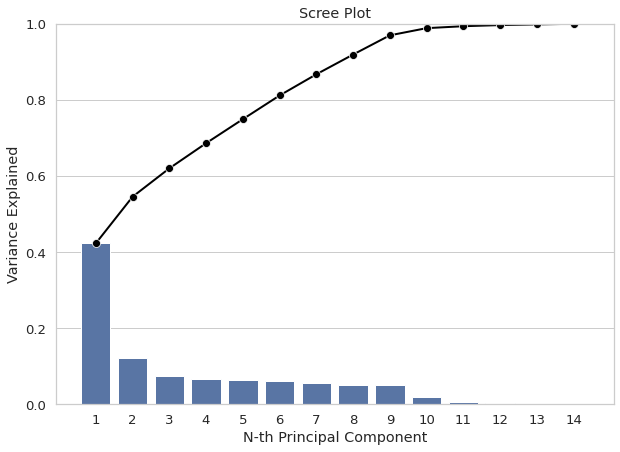

In [84]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

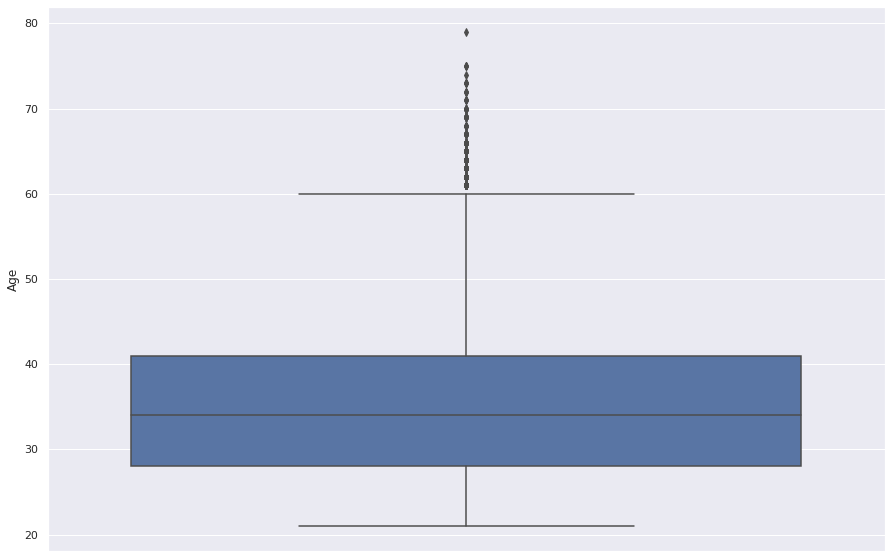

In [93]:
#Visualización de Variables Categoricas

sns.boxplot(y="Age", data=ndf)

**9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

Graficos utilizados durante el desarrollo del ejercicio:

**Heat Map** 

**Histograma** 

**Boxplot** 


**10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**


**Heat Map:** Se utiliza Heat Map para visualizar de una mejor manera la correlación entre las variables numericas.

**Histograma:** Se utilizo para mostrar de manera grafica la varianza que aporta cada Componente Principal dentro de la base de datos. Aporta el resultado los PC y de esta menara tomar la decision de cuales variables se podrian obtimizar.

**Boxplot:** Se utilizaron para describir y visualizar variables categoricas es este caso la Edad que solicita el credito.
